In [10]:
from pathlib import Path

import matplotlib.pyplot as plt

from toolbox_continu_inzicht import Config, DataAdapter


In [11]:
path = Path.cwd() / "data"
config = Config(config_path=path / "integrate_statistics_demo.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

In [12]:
from toolbox_continu_inzicht.fragility_curves import IntegrateFragilityCurve

In [13]:
integrate_statistics_per_section = IntegrateFragilityCurve(data_adapter=data_adapter)
integrate_statistics_per_section.run(
    input=["exceedance_curve_csv", "fragility_curve_csv"], output="result"
)

Faalkansbijdrage: 1.102e-02


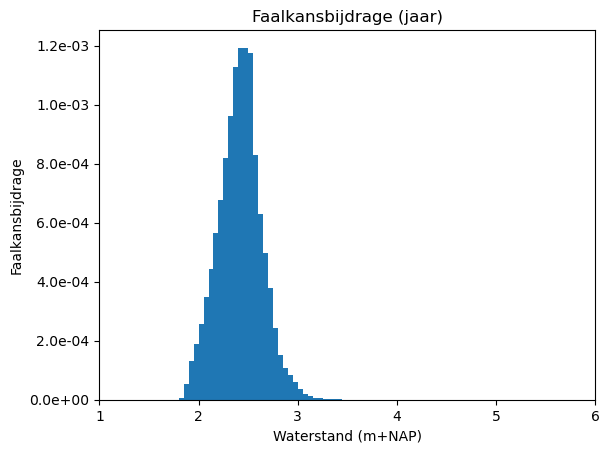

In [14]:
fig, ax = plt.subplots()
ax.bar(
    integrate_statistics_per_section.df_out["hydraulicload"],
    integrate_statistics_per_section.df_out["probability_contribution"],
    width=0.1,
)
ax.set_xlim([1, 6])
ax.set_title("Faalkansbijdrage (jaar)")
ax.set_xlabel("Waterstand (m+NAP)")
ax.set_ylabel("Faalkansbijdrage")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1e}"))

print(
    f"Faalkansbijdrage: {integrate_statistics_per_section.df_out['probability_contribution'].sum():.3e}"
)